In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
# INITIALIZE VARIABLES
N = 2000

T = 200
dt = 0.05

K = 1
runs = np.arange(10)

t = np.arange(0, T+dt, dt)
thetas = np.zeros((N, t.size))

f = np.zeros(N)

r = np.zeros((runs.size,t.size))
psi = np.zeros((runs.size,t.size))

def timer(start,end):   # Show execution time in the format "hours : minutes : seconds"
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("Execution time (h:m:s): "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [44]:
#omegas = np.random.uniform(-0.5,0.5,N) # UNIFORMLY distributed natural frequencies. mean 0, sd 1, size (N,1); row vector
thetas[:,0] = np.random.uniform(0,2*np.pi,(1,N))  # the initial theta values: uniformly distributed between 0 and 2pi


for s in runs: #NOTE s is the run index, not a "K" index.
    start_time = time.time()     #Initial time for execution time calculation

    print("Run: "+str(s))
    timer(start_time, time.time())       # Time of execution

    omegas = np.random.uniform(-0.5,0.5,N) # UNIFORMLY distributed natural frequencies. mean 0, sd 1, size (N,1); row vector
    #thetas[:,0] = np.random.uniform(0,2*np.pi,(1,N))  # the initial theta values: uniformly distributed between 0 and 2pi

    for i in range(0,t.size):
        z = 1/N*np.sum(np.exp(0+1j*thetas[:,i])) # order parameter

        r[s,i] = np.absolute(z) # modulus. NOTE: remove array if not used.
        psi[s,i] = np.angle(z) # global phase

        f = omegas + K*r[s,i]*np.sin(psi[s,i]-thetas[:,i])

        if i >= t.size-1:
            break
        thetas[:,i+1] = thetas[:,i] + dt * f


    print("Code finished.")
    timer(start_time, time.time())       # Time of execution

    
# SAVE FILE
timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

np.savetxt("UNIFORM_K=1_data"+timestring+".csv", r, delimiter=",")

Run: 0
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.77
Run: 1
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.77
Run: 2
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.78
Run: 3
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.71
Run: 4
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.73
Run: 5
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.72
Run: 6
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.73
Run: 7
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.72
Run: 8
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.71
Run: 9
Execution time (h:m:s): 00:00:00.00
Code finished.
Execution time (h:m:s): 00:00:00.73


In [10]:
# SAVE FILE
timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

np.savetxt("UNIFORM_K=1_data"+timestring+".csv", r, delimiter=",")

In [3]:
# LOAD FILE
filename4 = "UNIFORM_K=1_data2021-01-19_15-49-04.csv" #FIXED OMEGA_i's
filename5 = "UNIFORM_K=1_data2021-01-19_16-21-21.csv"  #FIXED THETA_i's

rsaved4 = np.loadtxt(filename4, delimiter=',')
rsaved5 = np.loadtxt(filename5, delimiter=',')

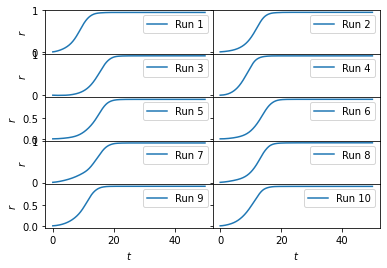

Code finished.


In [46]:
fig, axs = plt.subplots(5, 2,sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

for s in runs:
    ax=axs[s//2,s%2]
    ax.plot(t[0:1000],rsaved[s,0:1000],label="Run "+str(s+1))
    ax.set(xlabel=r'$t$', ylabel=r'$r$')
    ax.legend()
    
    
for ax in axs.flat:
    ax.label_outer()

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("iv_phase_coherence_FIXED_theta"+timestring, dpi=600, bbox_inches='tight')    
plt.show()
print("Code finished.")

In [4]:
for s in runs:
    plt.plot(t[0:1000],rsaved[s,0:1000],label="Run "+str(s+1))

#plt.title("Coherence parameter, fixed "+r'$\omega_i$')
plt.title("Coherence parameter, fixed "+r'$\theta_i(0)$')

plt.xlabel(r'$t$')
plt.ylabel(r'$r$')
plt.legend()

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("iv_COMBINED_phase_coherence_FIXED_theta"+timestring, dpi=600, bbox_inches='tight')    
plt.show()
print("Code finished.")

NameError: name 'rsaved' is not defined

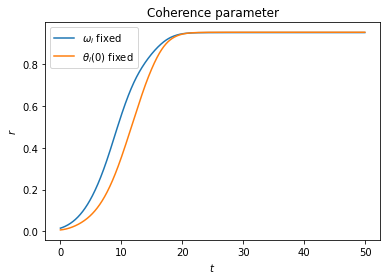

Code finished.


In [6]:
mean4=np.mean(rsaved4, axis=0)
sd4=np.std(rsaved4, axis=0)

mean5=np.mean(rsaved5, axis=0)
sd5=np.std(rsaved5, axis=0)

plt.plot(t[0:1000],mean4[0:1000],label=r'$\omega_i$'+" fixed")
plt.plot(t[0:1000],mean5[0:1000],label=r'$\theta_i(0)$'+" fixed")


plt.title("Coherence parameter")

plt.xlabel(r'$t$')
plt.ylabel(r'$r$')
plt.legend()

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("iv_v_COMBINED_phase_coherence_BOTH"+timestring, dpi=600, bbox_inches='tight')    
plt.show()
print("Code finished.")